In [6]:
# 폴더 안 자료 읽기 -> 1. list dir 2. glob

baseFolder="c:/data/img/"

import os
print(os.listdir(baseFolder))  # data 안의 파일만 보여줌

from glob import glob
glob(baseFolder+'*')  # 폴더 경로와 더불어 나옴, 주로 사용함
# * : 전체 데이터를 가져온다는 의미
# 윈도우 계열은 \ 하나만 사용하는 경우 escape 문자와 겹치는 문제가 있음

['cells.png', 'lena_color.bmp', 'pen.png', 'rice.png', 'Taegeuk.bmp', 'Taegeuk_result.png', '고등어.png', '나비.png']


['c:/data/img\\cells.png',
 'c:/data/img\\lena_color.bmp',
 'c:/data/img\\pen.png',
 'c:/data/img\\rice.png',
 'c:/data/img\\Taegeuk.bmp',
 'c:/data/img\\Taegeuk_result.png',
 'c:/data/img\\고등어.png',
 'c:/data/img\\나비.png']

In [7]:
!pip install PILLOW  # 이미지 처리 기본모듈 
# 중고급 모듈 (OpenCV), 분석 관련 이미지 처리 (skimg)

In [16]:
from glob import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

baseFolder="c:/data/img/"
fileList=glob(baseFolder + '*')

sh3, sh4 = [],[]  # 채널의 마지막 수에 따라 분류
sh3Cnt,sh4Cnt=0,0

for cnt, i in enumerate(fileList):
    img=Image.open(i).resize((100,200))
    imgArr=np.array(img)/255
    # plt.imshow(imgArr)
    # plt.show()
    # print('\nfile : ', i, '-'*20)
    # print(imgArr.shape)  # shape 대신 헤더 포맷을 보는 명령어를 주로 사용

    if cnt%2==0: print(cnt, 'bun process')

    if imgArr.shape[2]==3:
        sh3.append(imgArr)
        sh3Cnt+=1
    else:
        sh4.append(imgArr)
        sh4Cnt+=1

print(sh3Cnt, sh4Cnt)


0 bun process
2 bun process
4 bun process
6 bun process
4 4


In [14]:
sh3

[array([[[0.9254902 , 0.92156863, 0.94509804],
         [0.81568627, 0.74901961, 0.74901961],
         [0.75294118, 0.70980392, 0.70980392],
         ...,
         [0.89803922, 0.9254902 , 0.96470588],
         [0.94509804, 0.98039216, 1.        ],
         [0.94509804, 0.98039216, 1.        ]],
 
        [[0.90980392, 0.8627451 , 0.88235294],
         [0.78039216, 0.72156863, 0.72156863],
         [0.76078431, 0.71372549, 0.71372549],
         ...,
         [0.91764706, 0.95686275, 0.98823529],
         [0.94509804, 0.98039216, 1.        ],
         [0.94901961, 0.98431373, 1.        ]],
 
        [[0.86666667, 0.80784314, 0.81568627],
         [0.76078431, 0.71372549, 0.70588235],
         [0.76862745, 0.71372549, 0.71372549],
         ...,
         [0.94117647, 0.98431373, 1.        ],
         [0.94901961, 0.98039216, 0.99607843],
         [0.95294118, 0.98431373, 1.        ]],
 
        ...,
 
        [[0.57254902, 0.49803922, 0.71764706],
         [0.48627451, 0.51764706, 0.76078

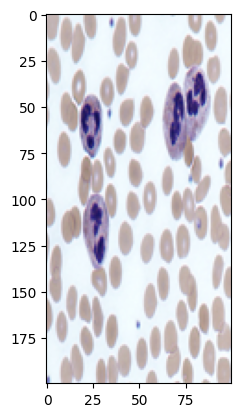

In [15]:
plt.imshow(sh3[0])

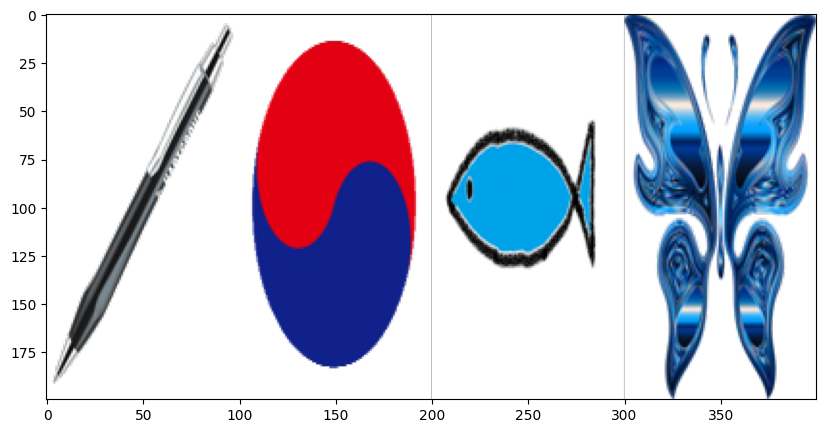

In [47]:
plt.figure(figsize=(20,5))
plt.imshow(np.hstack(sh4[:]))

In [48]:
np.shape(sh3[0])

(200, 100, 3)

[[[[88.23529412 53.33333333 49.41176471]
   [89.01960784 53.33333333 48.23529412]
   [87.84313725 52.54901961 46.2745098 ]
   ...
   [72.94117647 33.33333333 35.68627451]
   [81.96078431 44.70588235 43.1372549 ]
   [89.01960784 54.90196078 46.2745098 ]]

  [[88.23529412 53.33333333 49.01960784]
   [89.01960784 53.33333333 47.84313725]
   [87.84313725 52.15686275 45.88235294]
   ...
   [72.94117647 33.33333333 35.68627451]
   [82.35294118 44.70588235 43.1372549 ]
   [88.62745098 53.7254902  45.49019608]]

  [[88.23529412 52.54901961 46.2745098 ]
   [89.01960784 52.15686275 45.09803922]
   [88.23529412 50.98039216 42.74509804]
   ...
   [76.47058824 36.07843137 36.8627451 ]
   [76.47058824 38.03921569 38.03921569]
   [59.60784314 25.49019608 32.54901961]]

  ...

  [[36.8627451  10.98039216 23.52941176]
   [37.64705882 11.37254902 25.09803922]
   [45.88235294 20.39215686 34.11764706]
   ...
   [39.21568627 10.58823529 23.1372549 ]
   [44.31372549 14.50980392 25.49019608]
   [56.8627451  

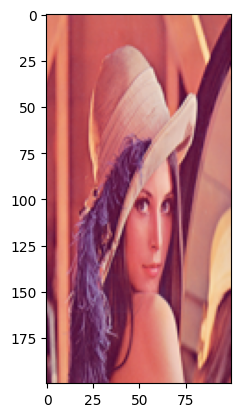

In [51]:
# print(np.shape(sh3))
# print(sh4[])
print(sh3[1]*[[[[100]]]])

plt.imshow(sh3[1])

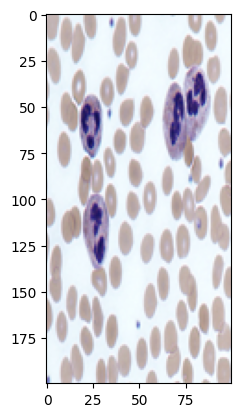

In [59]:
sh3im = sh3[0]
plt.imshow(sh3im)

In [63]:
file = fileList[0]
img=Image.open(file).resize((20,30))
imgArr=np.array(img)/256 # scailing
np.save('c:/data/test.npy', imgArr)  # npy : 하나의 numpy array

In [65]:
file=np.load('c:/data/test.npy')
# scailing 여부 확인 : min max 값 확인을 통해
# 소수점 단위로 떨어진다면 100% scailing 된 자료임
# but 나눈 단위는 알 수 없음
np.min(file), np.max(file)

(0.17578125, 0.99609375)

In [78]:
file

'c:/data/img\\나비.png'

In [80]:
x=[];y=[] # imgData : x, label : y

for file in fileList:
    img=Image.open(file).resize((20,30))
    imgArr=np.array(img)/256 # scailing

    if imgArr.shape[2]==3:  # [r,g,b]로 되어있는 자료만 저장, shape 시 30,20,3인 자료만 저장 (jpg)
        x.append(imgArr)
        #fileList[0], fileList[0].split('\\')[1]
        name=file.split('\\')[1]
        fileName=name.split('.')[0]

        y.append(fileName)
        # 파일명 따로 저장


# file=fileList[1]
# img=Image.open(file).resize((20,30))
# imgArr=np.array(img)/256 # scailing

# x.append(imgArr)
# y.append('lena_color')


In [81]:
np.savez('c:/data/imgsXY.npz', xData=x, yData=y)

In [82]:
npzList=np.load('c:/data/imgsXY.npz')
list(npzList)

['xData', 'yData']

In [83]:
xx,yy=npzList['xData'], npzList['yData']
np.shape(xx), np.shape(yy)
# 30개의 행, 20개의 열, 3채널인 자료 4개

((4, 30, 20, 3), (4,))

In [87]:
np.min(xx), np.max(xx)
# numpy를 jpg로 저장하는 경우 값이 매우 작으므로 새까맣게 나옴
# 0에 가까울 수록 검은 색, 255에 가까울 수록 흰 색
# 따라서 jpg로 저장하는 경우 다시 축소한 만큼 곱해주는 작업 필요

(0.0, 0.99609375)

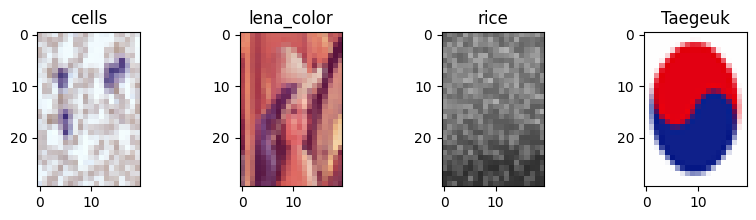

In [86]:
cnt=1
plt.figure(figsize=(10,2))
for x,y in zip(xx,yy):
    plt.subplot(1,len(xx),cnt) # 1개의 행에 4개의 작업 진행
    # 열거형 변수(enumerate)를 사용하는 경우 cnt+1을 해줌, 일반 변수를 사용하는 경우 1로 시작
    plt.imshow(x)
    plt.title(y)
    cnt+=1

In [88]:
!pip install tensorflow-cpu

     ---------------------------------------- 0.0/272.9 MB ? eta -:--:--
     --------------------------------------- 0.3/272.9 MB 10.9 MB/s eta 0:00:26
     --------------------------------------- 1.0/272.9 MB 12.1 MB/s eta 0:00:23
     --------------------------------------- 1.8/272.9 MB 14.5 MB/s eta 0:00:19
     --------------------------------------- 2.3/272.9 MB 13.5 MB/s eta 0:00:21
     --------------------------------------- 2.9/272.9 MB 13.2 MB/s eta 0:00:21
      -------------------------------------- 3.5/272.9 MB 13.3 MB/s eta 0:00:21
      -------------------------------------- 4.3/272.9 MB 13.8 MB/s eta 0:00:20
      -------------------------------------- 4.9/272.9 MB 13.7 MB/s eta 0:00:20
      -------------------------------------- 5.4/272.9 MB 13.7 MB/s eta 0:00:20
      -------------------------------------- 5.9/272.9 MB 12.9 MB/s eta 0:00:21
      -------------------------------------- 6.2/272.9 MB 12.7 MB/s eta 0:00:21
      -------------------------------------- 6.

In [92]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
aa=mnist.load_data()
print(type(aa))
aa[0]  # gray image, [[가 한 이미지임, 이에 해당하는 y값도 있음
# aa[0]: 훈련 데이터, aa[1]: 테스트 데이터
# (훈련x, 훈련y), (테스트x, 테스트y)=(aa[0][0], aa[0][1]),(aa[1][0], aa[1][1])

<class 'tuple'>


(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [93]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
np.shape(x_train), np.shape(y_train)

((60000, 28, 28), (60000,))

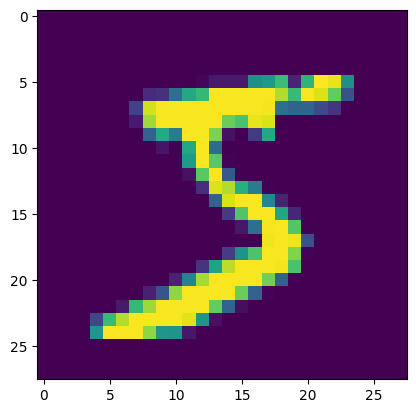

In [94]:
xx=x_train[:5]
yy=y_train[:5]

plt.imshow(xx[0])

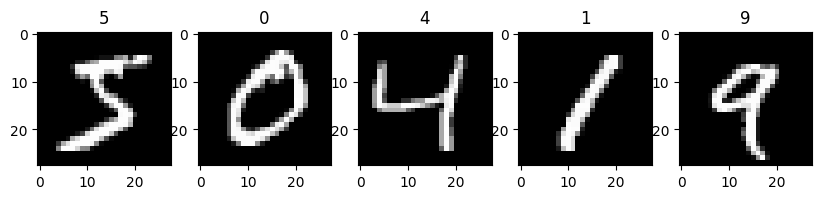

In [95]:
cnt=1
plt.figure(figsize=(10,2))
for x,y in zip(xx,yy):
    plt.subplot(1,len(xx),cnt) # 1개의 행에 4개의 작업 진행
    # 열거형 변수(enumerate)를 사용하는 경우 cnt+1을 해줌, 일반 변수를 사용하는 경우 1로 시작
    plt.imshow(x, cmap='gray')
    plt.title(y)
    cnt+=1

jpg or png와 같이 파일로 존재하지 않는 이미지 처리 시에 load (np.load 등...)로 array를 불러와서 사용하고자 할 때는 npy 또는 npz로 저장함

인공 지능 데이터셋은 일반적으로 훈련 x, 훈련 y, 테스트 x, 테스트 y로 저장되지만 공식은 없음